In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/Users/macbookpro/Documents/Data Science /classification/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [3]:
from sklearn.model_selection import train_test_split

X_train , X_test ,Y_train , Y_test = train_test_split(X,y,train_size=0.25 , random_state=0) 

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7,weights='uniform', algorithm='auto', leaf_size=30, p=3, metric='minkowski')

model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7, p=3)

In [6]:
print(model.predict(sc.transform([[30,87000]])))

[0]


In [7]:
from sklearn.metrics import confusion_matrix ,accuracy_score

y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)


accuracy_score(Y_test,y_pred)

[[171  15]
 [ 20  94]]


0.8833333333333333

/var/folders/by/qwhg_4k53q1dbsjvmpskx7s80000gn/T/ipykernel_7264/373430982.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


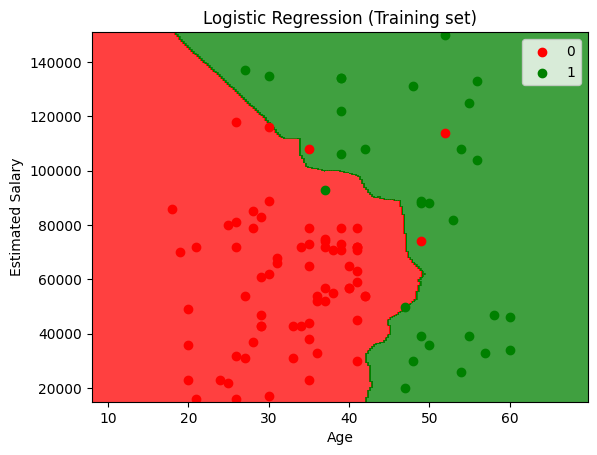

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()